The following code has the cleaning/merging and the Exploratory Basket analysis.
Import required packages:

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the CSV data from the kaggle competition for Instacart market basket analysis: https://www.kaggle.com/competitions/instacart-market-basket-analysis

In [3]:
# load the data to dataframes
orders=pd.read_csv("/Users/athanasioskritikos/Documents/GitHub/Sycamore project/instacart-market-basket-analysis/orders.csv")
products=pd.read_csv("/Users/athanasioskritikos/Documents/GitHub/Sycamore project/instacart-market-basket-analysis/products.csv")
aisles=pd.read_csv("/Users/athanasioskritikos/Documents/GitHub/Sycamore project/instacart-market-basket-analysis/aisles.csv")
departments=pd.read_csv("/Users/athanasioskritikos/Documents/GitHub/Sycamore project/instacart-market-basket-analysis/departments.csv")
order_products_prior=pd.read_csv("/Users/athanasioskritikos/Documents/GitHub/Sycamore project/instacart-market-basket-analysis/order_products__prior.csv")

In [4]:
from IPython.display import display
display(orders.head())
display(orders.info())
display(orders.isnull().sum())
display(products.head())
display(products.info())
display(products.isnull().sum())
display(aisles.head())
display(aisles.info())
display(aisles.isnull().sum())
display(departments.head())
display(departments.info())
display(departments.isnull().sum())
display(order_products_prior.head())
display(order_products_prior.info())
display(order_products_prior.isnull().sum())

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


None

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


None

aisle_id    0
aisle       0
dtype: int64

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


None

department_id    0
department       0
dtype: int64

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


None

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Cleaning and merging our data into one table.

In [5]:
products=pd.merge(aisles, products, on="aisle_id")
products=pd.merge(departments, products, on="department_id")
products=pd.merge(order_products_prior, products, on="product_id")
products_and_orders=pd.merge(products, orders, on="order_id")
products_and_orders.head(10)

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,16,dairy eggs,86,eggs,Organic Egg Whites,202279,prior,3,5,9,8.0
1,2,28985,2,1,4,produce,83,fresh vegetables,Michigan Organic Kale,202279,prior,3,5,9,8.0
2,2,9327,3,0,13,pantry,104,spices seasonings,Garlic Powder,202279,prior,3,5,9,8.0
3,2,45918,4,1,13,pantry,19,oils vinegars,Coconut Butter,202279,prior,3,5,9,8.0
4,2,30035,5,0,13,pantry,17,baking ingredients,Natural Sweetener,202279,prior,3,5,9,8.0
5,2,17794,6,1,4,produce,83,fresh vegetables,Carrots,202279,prior,3,5,9,8.0
6,2,40141,7,1,13,pantry,105,doughs gelatins bake mixes,Original Unflavored Gelatine Mix,202279,prior,3,5,9,8.0
7,2,1819,8,1,13,pantry,88,spreads,All Natural No Stir Creamy Almond Butter,202279,prior,3,5,9,8.0
8,2,43668,9,0,4,produce,123,packaged vegetables fruits,Classic Blend Cole Slaw,202279,prior,3,5,9,8.0
9,26,33120,5,0,16,dairy eggs,86,eggs,Organic Egg Whites,153404,prior,2,0,16,7.0


Exporting that table to a csv file.

In [6]:
products_and_orders.to_csv('/Users/athanasioskritikos/Documents/GitHub/Sycamore project/instacart-market-basket-analysis/products_and_orders.csv')

In [7]:
# most ordered products
top_ten_products=products["product_name"].value_counts().head(10)
top_ten_products

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: product_name, dtype: int64

In [9]:
bottom_products=products["product_name"].value_counts().tail(133)
bottom_products

Bogota Blackberry Lime Sparkling Antioxidant Infused Beverage    2
Serrated Steak Knives                                            2
Petite Black Eyed Peas                                           1
Master Blend Ground Coffee                                       1
Brut Prosecco                                                    1
                                                                ..
Frittata, Farmer's Market                                        1
Fig Balsamic Vinegar                                             1
Punjabi Chhole, Hot Spicy                                        1
Molasses, Bead                                                   1
Flatbread Pizza All Natural                                      1
Name: product_name, Length: 133, dtype: int64

/Users/athanasioskritikos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


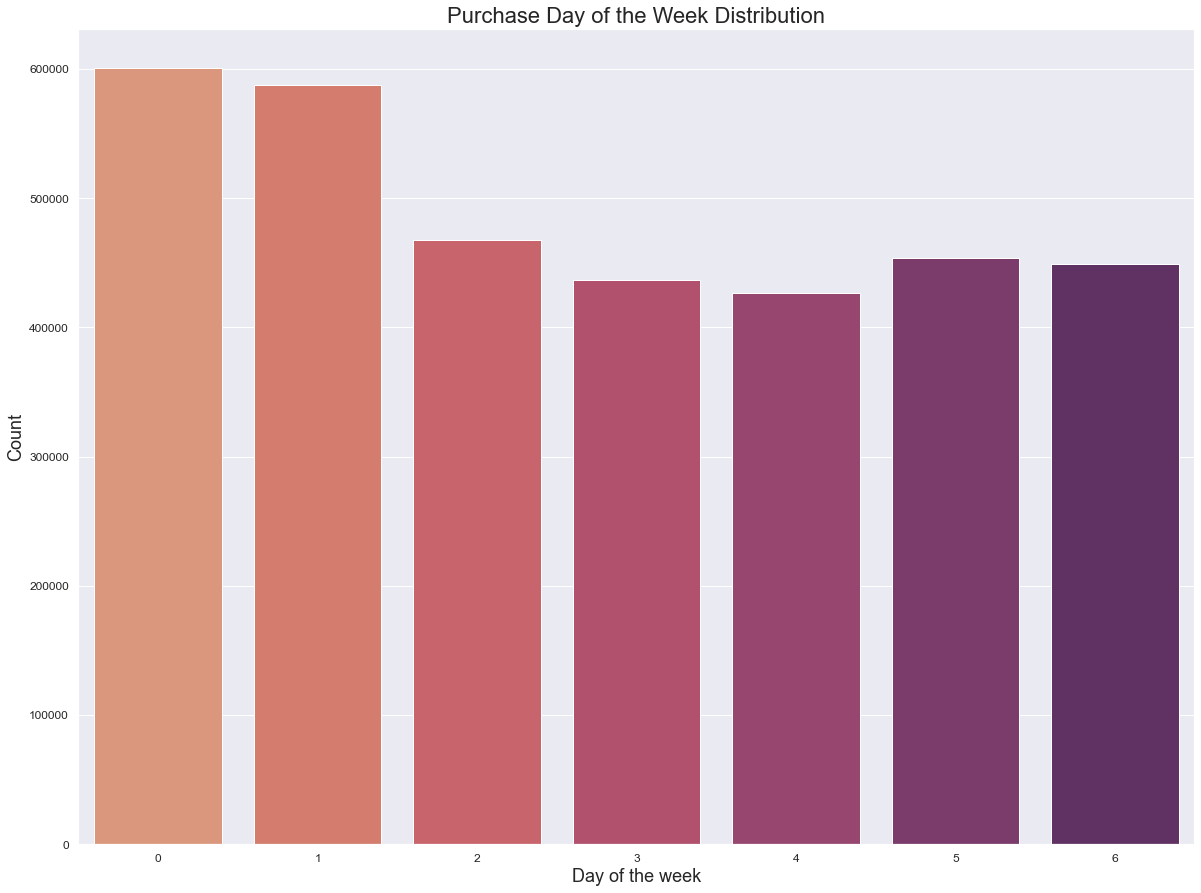

In [10]:
plt.figure(figsize=(20,15))
sns.countplot(orders["order_dow"], palette="flare")

sns.set(font_scale=1)
plt.xlabel('Day of the week', fontsize=18);
plt.ylabel('Count', fontsize=18);
plt.title("Purchase Day of the Week Distribution", fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.figure(figsize=(25,15))
sns.countplot(orders_per_customer["order_number"])
plt.title("Number of Orders Vs Number of Customer Makes These Orders")
plt.xlabel("Number of Orders By Customers")
plt.ylabel("Number of Customers")


/Users/athanasioskritikos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

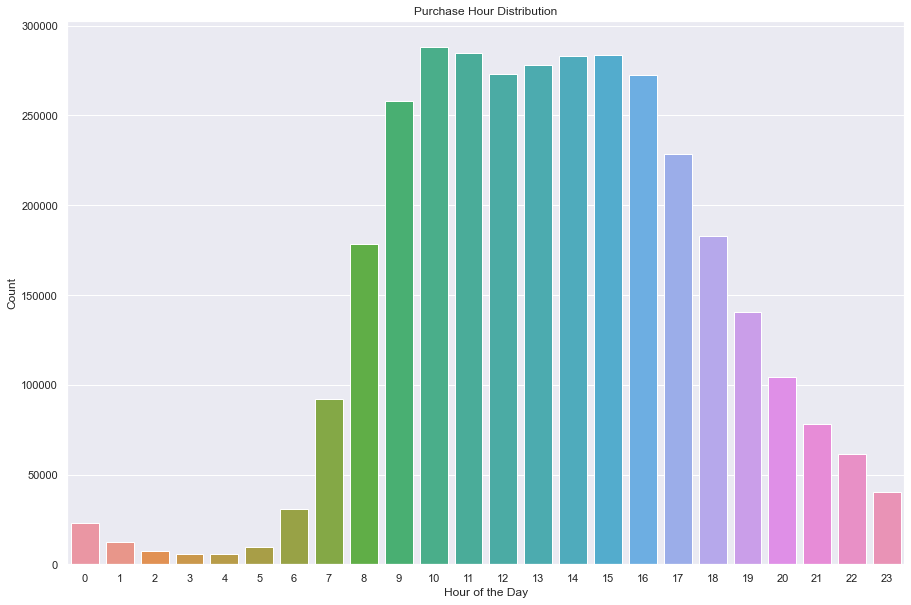

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(orders["order_hour_of_day"])
plt.title("Purchase Hour Distribution")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")

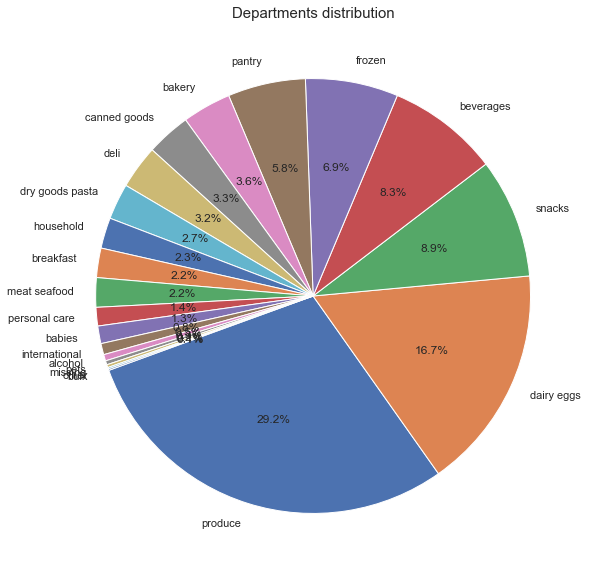

In [14]:
plt.figure(figsize=(10,10))
temp_series = products_and_orders['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

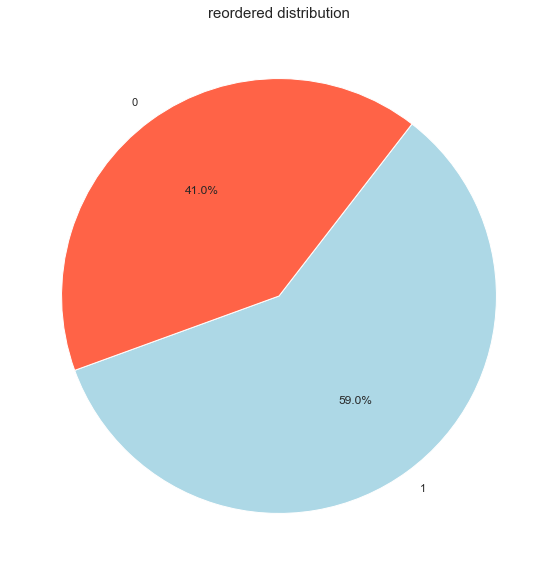

In [57]:
plt.figure(figsize=(10,10))
temp_series = products_and_orders['reordered'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200,colors=['lightblue','tomato'])
plt.title("reordered distribution", fontsize=15)
plt.show()

/Users/athanasioskritikos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


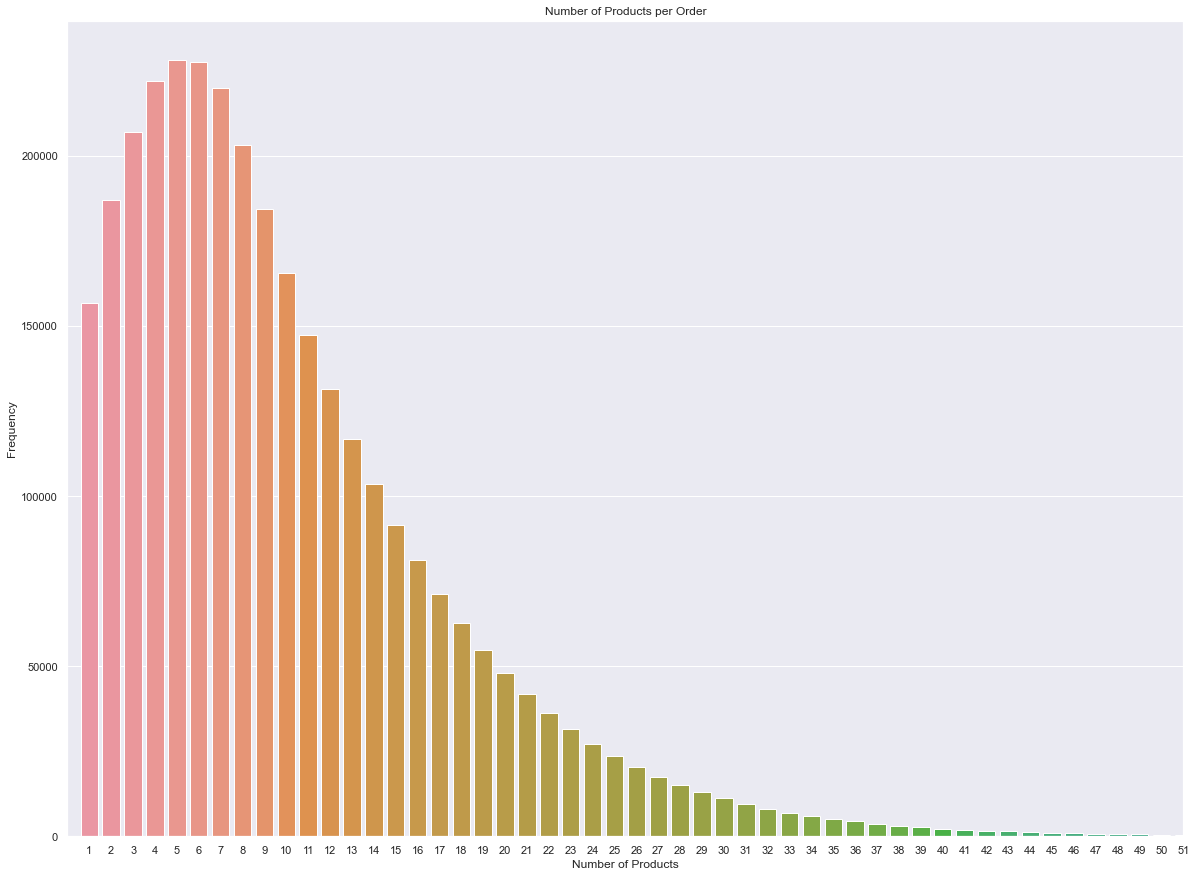

In [32]:
product_amount_per_order=products.groupby("order_id")["add_to_cart_order"].max().reset_index()
plt.figure(figsize=(20,15))
sns.countplot(product_amount_per_order["add_to_cart_order"])
plt.title("Number of Products per Order")
plt.xlabel("Number of Products")
plt.ylabel("Frequency")
plt.xlim([-1, 50])
plt.show()

Text(0, 0.5, 'Count')

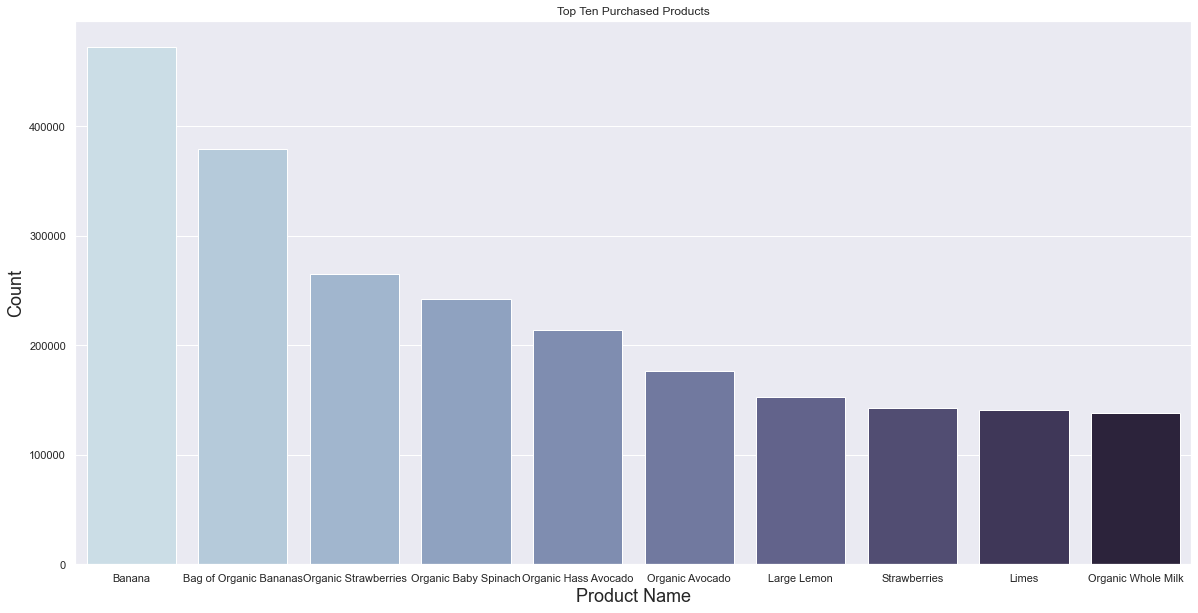

In [48]:
top_ten_products=products["product_name"].value_counts().head(10)
top_ten_products
plt.figure(figsize=(20,10))
sns.countplot(x="product_name", data=products, order=products.product_name.value_counts().iloc[:10].index, palette="ch:s=.25,rot=-.25")
plt.title("Top Ten Purchased Products")
plt.xlabel("Product Name", fontsize=18)
plt.ylabel("Count", fontsize=18)

Extra graphs that were estimated but not included in the presentation:

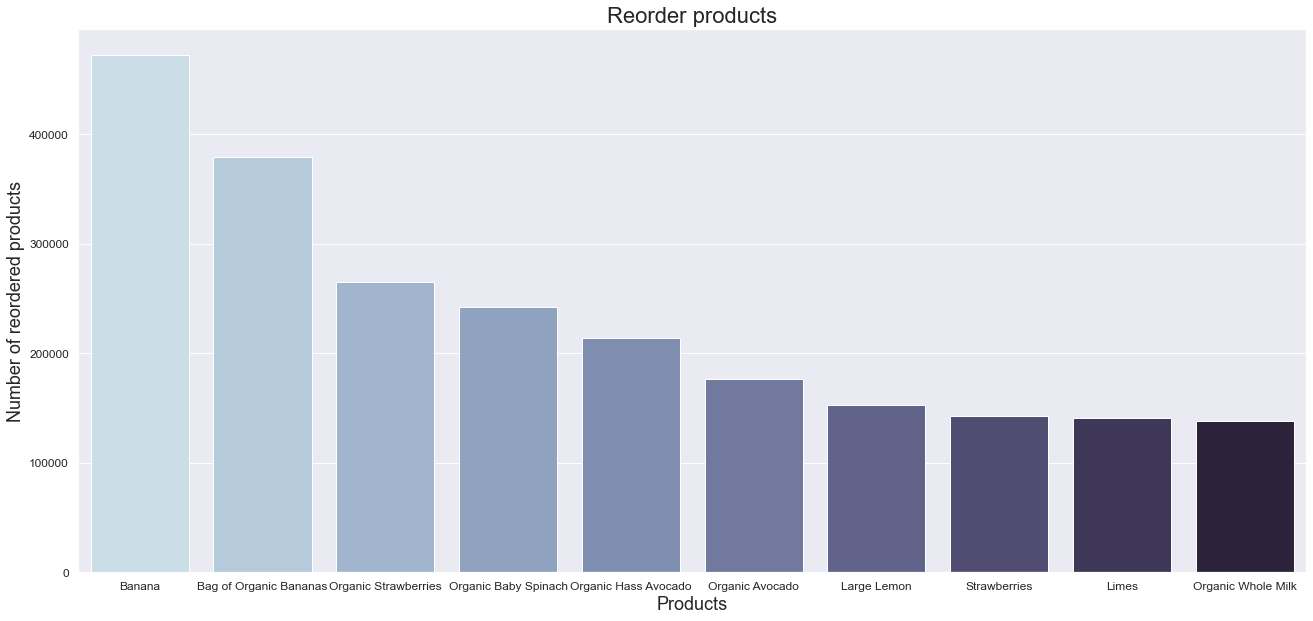

In [60]:
# look at the reorders
product_reorders=products.groupby(['product_id', 'product_name'])['reordered'].count().reset_index()
product_reorders_top_ten=product_reorders.nlargest(10, "reordered")
product_reorders_top_ten

plt.figure(figsize=(22,10))
sns.barplot(x="product_name", y="reordered", data=product_reorders_top_ten, palette="ch:s=.25,rot=-.25")
sns.set(font_scale=1)
plt.xlabel('Products', fontsize=18);
plt.ylabel('Number of reordered products', fontsize=18);
plt.title('Reorder products', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=12)

/Users/athanasioskritikos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Customers')

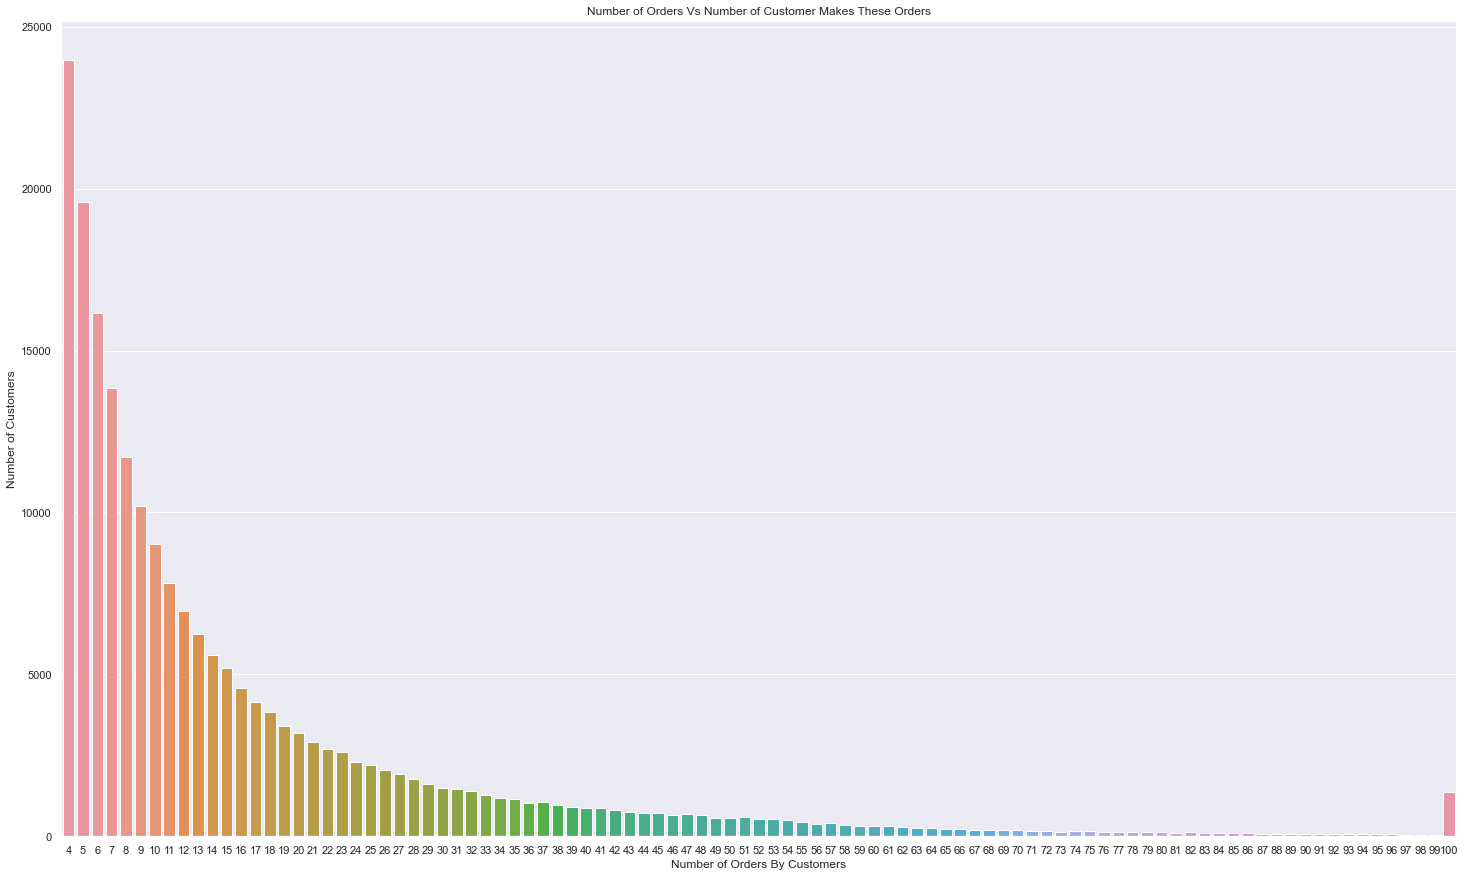

In [11]:
# look at orders per customer
orders_per_customer=orders.groupby("user_id")["order_number"].max().reset_index()
orders_per_customer.head()

plt.figure(figsize=(25,15))
sns.countplot(orders_per_customer["order_number"])
plt.title("Number of Orders Vs Number of Customer Makes These Orders")
plt.xlabel("Number of Orders By Customers")
plt.ylabel("Number of Customers")

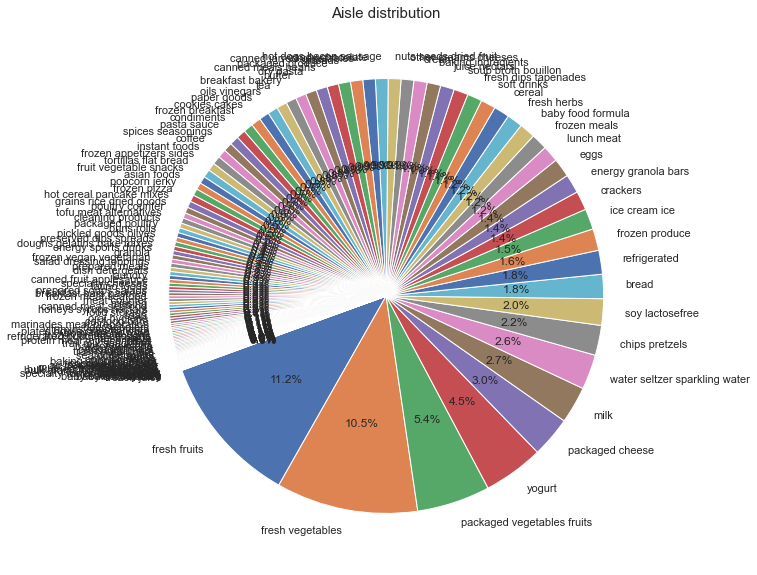

In [59]:
plt.figure(figsize=(10,10))
temp_series = products_and_orders['aisle'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Aisle distribution", fontsize=15)
plt.show()

/Users/athanasioskritikos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

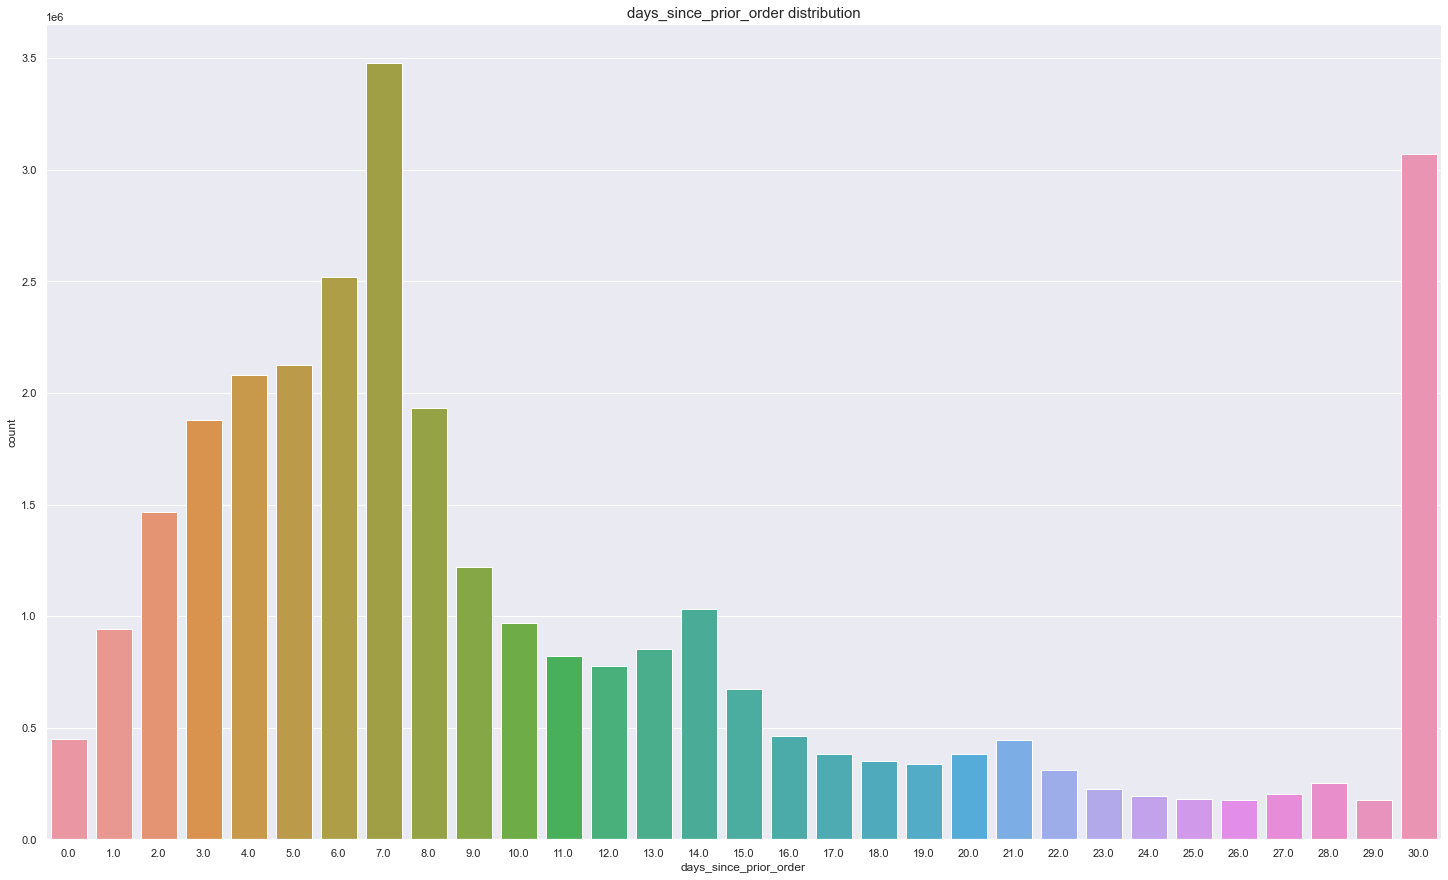

In [19]:
plt.figure(figsize=(10,10))
temp_series = products_and_orders['days_since_prior_order'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.figure(figsize=(25,15))
sns.countplot(products_and_orders['days_since_prior_order'])
#plt.pie(sizes, labels=labels, 
 #       autopct='%1.1f%%', startangle=200)
plt.title("days_since_prior_order distribution", fontsize=15)
plt.show()